# Import Libray

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from keras.datasets import mnist
from tensorflow import keras

In [2]:
print(keras.__version__)
print(plt.__version__)
print(np.__version__)

2.6.0


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

# Persiapan Data

In [5]:
# Data sebesar 11MB akan didownload secara otomatis jika belum pernah sebelumnya
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [6]:
# Mendapatkan unique data
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

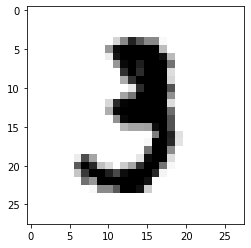

In [7]:
# Menampilkan salah satu data dengan matplotlib
plt.imshow(x_train[10],cmap='binary');

# Membangun Neural Network

In [8]:
model = keras.Sequential([
    # Input Layers
    keras.layers.Flatten(input_shape=(28,28,)),
    
    # Hidden Layers
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    
    # Output Layers
    keras.layers.Dense(10,activation='softmax')
])

# Input shape merupakan ukuran gambar yaitu 28x28
# Untuk output layer 10 unit merupakan jumlah dari unique data

In [11]:
# Compile model
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [12]:
# Menampilkan informasi model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

# Membuat Earlystopping Function

In [13]:
earlystopping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

# Melatih Neural Network

In [14]:
# Masukan hasil latihan ke dalam variabel history agar dapat dilihat progressnya setelah selesai
# Alternatif untuk penggunaan tensorboard
history = model.fit(x_train,y_train,verbose=1,epochs=50,batch_size=32,callbacks=[earlystopping])

Epoch 1/50
1875/1875 [==============================] - 26s 12ms/step - loss: 0.7545 - accuracy: 0.8348
Epoch 2/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2717 - accuracy: 0.9302
Epoch 3/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2066 - accuracy: 0.9468
Epoch 4/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1792 - accuracy: 0.9559
Epoch 5/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1495 - accuracy: 0.9624
Epoch 6/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1371 - accuracy: 0.96660s - loss: 0.1374 
Epoch 7/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1243 - accuracy: 0.9697
Epoch 8/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1122 - accuracy: 0.97260s - loss: 0.1118 - 
Epoch 9/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1126 - accuracy: 0.97300s - loss: 0
Epoch 10/50
18

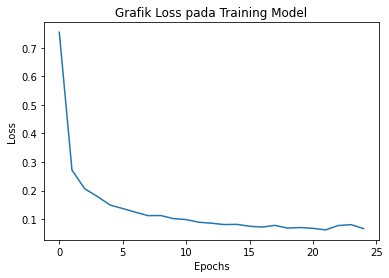

In [15]:
# Menampilkan grafik loss per epochs pada saat model berlatih
plt.plot(history.history['loss']);
plt.title('Grafik Loss pada Training Model')
plt.xlabel('Epochs')
plt.ylabel('Loss');

# Membuat Prediksi

In [ ]:
prediction_confidence = model.predict(x_test)

In [ ]:
prediction_confidence[0]

In [ ]:
prediction = list()
for pred in prediction_confidence:
    prediction.append(np.argmax(pred))
prediction = np.array(prediction)

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
prediction[0]

# Evaluasi Model

In [ ]:
prediction

In [ ]:
y_test

In [ ]:
np.unique([prediction == y_test],return_counts=True)

In [ ]:
# Evaluasi error metrics model
def getAkurasi(y_true,y_pred):
    prediction_accuracy = [y_true == y_pred]
    accuracy_metric = np.unique(prediction_accuracy,return_counts=True)
    print(f'Prediksi benar : {accuracy_metric[1][1]}')
    print(f'Prediksi salah : {accuracy_metric[1][0]}')
    print(f'Akurasi prediksi : {accuracy_metric[1][1] / (accuracy_metric[1][0] + accuracy_metric[1][1]) * 100}')

In [ ]:
getAkurasi(y_test,prediction)

# Visualisasi Prediksi

In [ ]:
import random

In [ ]:
prediction_confidence.shape

In [ ]:
def visualisasi(pred_conf,count):
    for i in range(count):
        index = random.choice(range(10000))
        fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(6,3))
        axes[0].imshow(x_test[index],cmap='binary')
        axes[0].set_title('Actual')
        axes[0].axis(False)

        axes[1].grid(True)
        axes[1].bar(range(10),pred_conf[index]*100)
        axes[1].set_title('Prediction With Confidence Level')
        axes[1].set_xticks(range(10))
        axes[1].set_yticks(range(0,110,10))

        plt.tight_layout()
        plt.show()

In [ ]:
# Visualisasikan 10 prediksi secara acak
visualisasi(prediction_confidence,10)

# Simpan Model

In [ ]:
model.save('Number Recognizer AI with Keras.h5')

In [17]:
! python wsgi.py

^C
